In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns
from scipy import stats
import datetime as datetime
Electricity_demands_by_region = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Electricity demand (TWh)-Table 1.csv',sep=';',decimal=',')
Electricity_generation_by_region = pd.read_csv('/Users/jaamann/Documents/Vs Code Python /Code Academy/Projects/Renewable Energy Project/WEO2024_Free_Dataset/Electricity generation (TWh)-Table 1.csv',sep=';',decimal=',')

In [381]:
Electricity_demands_by_region.head(20)

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Unnamed: 8,Unnamed: 9,...,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity demand (TWh),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents page,...,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Electricity demand (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Electricity,Final demand,TWh,World,2.0,NaN,World,...,25 502,26 172,NaN,32 929,37 371,49 694,NaN,33 772,40 450,60 258
9,GEC2024,1,Energy,Electricity,Final demand,TWh,North America,2.0,NaN,North America,...,4 958,4 890,NaN,5 444,6 115,7 840,NaN,5 597,6 673,9 815


In [382]:
Electricity_demands_by_region = Electricity_demands_by_region.dropna(how="all")  # Drops rows where all values are NaN
Electricity_demands_by_region = Electricity_demands_by_region.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Electricity_demands_by_region = Electricity_demands_by_region.drop(columns=["Unnamed: 8", "Unnamed: 9", "Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Electricity_demands_by_region.fillna(0, inplace=True)
Electricity_demands_by_region.info

<bound method DataFrame.info of    Publication Scenario Category      Product          Flow Unit  \
0            0        0        0            0             0    0   
1        WORLD    World        0            0             0    0   
2            0        0        0            0             0    0   
4            0        0        0            0             0    0   
5            0        0        0            0             0    0   
7            0        0        0            0             0    0   
8      GEC2024        1   Energy  Electricity  Final demand  TWh   
9      GEC2024        1   Energy  Electricity  Final demand  TWh   
10     GEC2024        1   Energy  Electricity  Final demand  TWh   
11     GEC2024        1   Energy  Electricity  Final demand  TWh   
12     GEC2024        1   Energy  Electricity  Final demand  TWh   
13     GEC2024        1   Energy  Electricity  Final demand  TWh   
14     GEC2024        1   Energy  Electricity  Final demand  TWh   
15     GEC2024  

In [383]:
# Drop all columns that contain "NO." in their column names
Electricity_demands_by_region = Electricity_demands_by_region.loc[:, ~Electricity_demands_by_region.columns.str.contains("NO\\.", case=False, regex=True)]
Electricity_demands_by_region

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,0,0,0,0,0,0.0,2010,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0,0,0
2,0,0,0,0,0,0,0,0.0,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,0.0,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,0.0,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
4,0,0,0,0,0,0,0,0.0,0,0,Electricity demand (TWh),0.0,0,0,0,0.0,0,0,0
5,0,0,0,0,0,0,0,0.0,0,0,0,0.0,Stated\nPolicies,0,0,0.0,Announced\nPledges,0,0
7,0,0,0,0,0,0,0,0.0,2010,2022,2023,0.0,2030,2035,2050,0.0,2030,2035,2050
8,GEC2024,1,Energy,Electricity,Final demand,TWh,World,2.0,18 503,25 502,26 172,0.0,32 929,37 371,49 694,0.0,33 772,40 450,60 258
9,GEC2024,1,Energy,Electricity,Final demand,TWh,North America,2.0,4 632,4 958,4 890,0.0,5 444,6 115,7 840,0.0,5 597,6 673,9 815
10,GEC2024,1,Energy,Electricity,Final demand,TWh,United States,2.0,3 880,4 117,4 044,0.0,4 485,5 037,6 448,0.0,4 610,5 489,8 077
11,GEC2024,1,Energy,Electricity,Final demand,TWh,Central and South America,2.0,932,1 138,1 182,0.0,1 418,1 650,2 495,0.0,1 534,1 908,3 468


In [ ]:
# Drop multiple rows by index
Electricity_demands_by_region = Electricity_demands_by_region.drop(index=[1, 2,]) 


# Reset index after dropping the row 
Electricity_demands_by_region = Electricity_demands_by_region.reset_index(drop=True)
Electricity_demands_by_region.tail()

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
15,GEC2024,1,Energy,Electricity,Final demand,TWh,Asia Pacific,2.0,7 132,12 897,13 645,0.0,18 171,20 549,26 883,0.0,18 268,21 415,30 830
16,GEC2024,1,Energy,Electricity,Final demand,TWh,China,2.0,3 659,8 010,8 601,0.0,11 626,12 863,15 627,0.0,11 652,13 260,16 477
17,GEC2024,1,Energy,Electricity,Final demand,TWh,India,2.0,715,1 391,1 510,0.0,2 300,2 833,4 539,0.0,2 191,2 797,5 384
18,GEC2024,1,Energy,Electricity,Final demand,TWh,Japan,2.0,1 071,922,934,0.0,951,971,1 036,0.0,972,1 042,1 226
19,GEC2024,1,Energy,Electricity,Final demand,TWh,Southeast Asia,2.0,607,1 156,1 204,0.0,1 644,2 011,3 106,0.0,1 705,2 180,4 255


In [385]:
# Drop the specified columns
Electricity_demands_by_region = Electricity_demands_by_region.drop(columns=["Publication", "Scenario", "Category", "Product", "Year", "Flow", "Unnamed: 13", "Unnamed: 17"])

# Display the updated DataFrame
Electricity_demands_by_region.head(20)


,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,0,0,0,0,Electricity demand (TWh),0,0,0,0,0,0
2,0,0,0,0,0,Stated\nPolicies,0,0,Announced\nPledges,0,0
3,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,TWh,World,18 503,25 502,26 172,32 929,37 371,49 694,33 772,40 450,60 258
5,TWh,North America,4 632,4 958,4 890,5 444,6 115,7 840,5 597,6 673,9 815
6,TWh,United States,3 880,4 117,4 044,4 485,5 037,6 448,4 610,5 489,8 077
7,TWh,Central and South America,932,1 138,1 182,1 418,1 650,2 495,1 534,1 908,3 468
8,TWh,Brazil,451,574,602,693,771,1 080,720,852,1 364
9,TWh,Europe,3 563,3 498,3 394,4 112,4 691,5 979,4 363,5 217,6 876


In [ ]:
# Drop multiple rows by index
Electricity_demands_by_region = Electricity_demands_by_region.drop(index=[0, 1, 2,])  


# Reset index after dropping the row 
Electricity_demands_by_region_cleaned = Electricity_demands_by_region.reset_index(drop=True)
Electricity_demands_by_region_cleaned.head(20)

,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,0,0,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,TWh,World,18 503,25 502,26 172,32 929,37 371,49 694,33 772,40 450,60 258
2,TWh,North America,4 632,4 958,4 890,5 444,6 115,7 840,5 597,6 673,9 815
3,TWh,United States,3 880,4 117,4 044,4 485,5 037,6 448,4 610,5 489,8 077
4,TWh,Central and South America,932,1 138,1 182,1 418,1 650,2 495,1 534,1 908,3 468
5,TWh,Brazil,451,574,602,693,771,1 080,720,852,1 364
6,TWh,Europe,3 563,3 498,3 394,4 112,4 691,5 979,4 363,5 217,6 876
7,TWh,European Union,2 571,2 474,2 381,2 875,3 289,4 195,3 077,3 682,4 716
8,TWh,Africa,570,721,729,979,1 198,2 088,1 146,1 550,3 372
9,TWh,Middle East,690,1 102,1 126,1 465,1 733,2 722,1 525,2 242,4 080


In [387]:
Electricity_generation_by_region.head(20)

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Unnamed: 8,Unnamed: 9,...,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation (TWh),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Back to contents page,...,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Total,Electricity generation,TWh,World,2.0,NaN,World,...,29 145,29 863,NaN,37 489,42 766,58 352,NaN,38 285,45 759,70 564
9,GEC2024,1,Energy,Total,Electricity generation,TWh,North America,2.0,NaN,North America,...,5 468,5 390,NaN,5 979,6 704,8 955,NaN,6 137,7 403,11 361


In [388]:
Electricity_generation_by_region = Electricity_generation_by_region.dropna(how="all")  # Drops rows where all values are NaN
Electricity_generation_by_region = Electricity_generation_by_region.dropna(axis=1, how="all")  # Drops columns where all values are NaN
Electricity_generation_by_region = Electricity_generation_by_region.drop(columns=["Unnamed: 8", "Unnamed: 9", "Unnamed: 43", "Unnamed: 47", "NO"], errors="ignore")
Electricity_demands_by_region.fillna(0, inplace=True)
Electricity_generation_by_region.info

<bound method DataFrame.info of    Publication Scenario Category Product                    Flow Unit  \
0          NaN      NaN      NaN     NaN                     NaN  NaN   
1        WORLD    World      NaN     NaN                     NaN  NaN   
2          NaN      NaN      NaN     NaN                     NaN  NaN   
4          NaN      NaN      NaN     NaN                     NaN  NaN   
5          NaN      NaN      NaN     NaN                     NaN  NaN   
7          NaN      NaN      NaN     NaN                     NaN  NaN   
8      GEC2024        1   Energy   Total  Electricity generation  TWh   
9      GEC2024        1   Energy   Total  Electricity generation  TWh   
10     GEC2024        1   Energy   Total  Electricity generation  TWh   
11     GEC2024        1   Energy   Total  Electricity generation  TWh   
12     GEC2024        1   Energy   Total  Electricity generation  TWh   
13     GEC2024        1   Energy   Total  Electricity generation  TWh   
14     GEC2024     

In [389]:
# Drop all columns that contain "NO." in their column names
Electricity_generation_by_region = Electricity_generation_by_region.loc[:, ~Electricity_generation_by_region.columns.str.contains("NO\\.", case=False, regex=True)]
Electricity_generation_by_region

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,WORLD,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Stated Policies Scenario,Stated Policies Scenario,Stated Policies Scenario,NaN,Announced Pledges Scenario,Announced Pledges Scenario,Announced Pledges Scenario
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
8,GEC2024,1,Energy,Total,Electricity generation,TWh,World,2.0,21 511,29 145,29 863,NaN,37 489,42 766,58 352,NaN,38 285,45 759,70 564
9,GEC2024,1,Energy,Total,Electricity generation,TWh,North America,2.0,5 230,5 468,5 390,NaN,5 979,6 704,8 955,NaN,6 137,7 403,11 361
10,GEC2024,1,Energy,Total,Electricity generation,TWh,United States,2.0,4 354,4 473,4 412,NaN,4 854,5 446,7 365,NaN,4 994,6 046,9 384
11,GEC2024,1,Energy,Total,Electricity generation,TWh,Central and South America,2.0,1 129,1 372,1 419,NaN,1 691,1 951,2 921,NaN,1 805,2 228,4 003


In [ ]:
# Drop multiple rows by index
Electricity_generation_by_region = Electricity_generation_by_region.drop(index=[1,2])  


# Reset index after dropping the row (optional)
Electricity_generation_by_region = Electricity_generation_by_region.reset_index(drop=True)
Electricity_generation_by_region.head()

,Publication,Scenario,Category,Product,Flow,Unit,Region,Year,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Unnamed: 13,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Unnamed: 17,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,2021.0,2030,2035,2050,2035.0,2030,2035,2050
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,NaN,Announced\nPledges,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,2022,2023,NaN,2030,2035,2050,NaN,2030,2035,2050
4,GEC2024,1,Energy,Total,Electricity generation,TWh,World,2.0,21 511,29 145,29 863,NaN,37 489,42 766,58 352,NaN,38 285,45 759,70 564


In [391]:
# Drop the specified columns
Electricity_generation_by_region = Electricity_generation_by_region.drop(columns=["Publication", "Scenario", "Category", "Product", "Year", "Flow", "Unnamed: 13", "Unnamed: 17"])

# Display the updated DataFrame
Electricity_generation_by_region.head(20)


,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,NaN,NaN,NaN,NaN,Electricity generation (TWh),NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Stated\nPolicies,NaN,NaN,Announced\nPledges,NaN,NaN
3,NaN,NaN,2010,2022,2023,2030,2035,2050,2030,2035,2050
4,TWh,World,21 511,29 145,29 863,37 489,42 766,58 352,38 285,45 759,70 564
5,TWh,North America,5 230,5 468,5 390,5 979,6 704,8 955,6 137,7 403,11 361
6,TWh,United States,4 354,4 473,4 412,4 854,5 446,7 365,4 994,6 046,9 384
7,TWh,Central and South America,1 129,1 372,1 419,1 691,1 951,2 921,1 805,2 228,4 003
8,TWh,Brazil,516,677,710,809,900,1 260,835,985,1 573
9,TWh,Europe,4 119,3 980,3 885,4 719,5 508,6 893,5 027,6 059,8 174


In [ ]:
# Drop multiple rows by index
Electricity_generation_by_region = Electricity_generation_by_region.drop(index=[1,2,3])  


# Reset index after dropping the row 
Electricity_generation_by_region_cleaned = Electricity_generation_by_region.reset_index(drop=True)
Electricity_generation_by_region_cleaned.head()

,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,TWh,World,21 511,29 145,29 863,37 489,42 766,58 352,38 285,45 759,70 564
2,TWh,North America,5 230,5 468,5 390,5 979,6 704,8 955,6 137,7 403,11 361
3,TWh,United States,4 354,4 473,4 412,4 854,5 446,7 365,4 994,6 046,9 384
4,TWh,Central and South America,1 129,1 372,1 419,1 691,1 951,2 921,1 805,2 228,4 003


In [393]:
Electricity_demands_by_region_cleaned.head()
Electricity_generation_by_region_cleaned.head()

,Unit,Region,Stated Policies Scenario,Stated Policies Scenario.1,Stated Policies Scenario.2,Stated Policies Scenario.3,Stated Policies Scenario.4,Stated Policies Scenario.5,Announced Pledges Scenario,Announced Pledges Scenario.1,Announced Pledges Scenario.2
0,NaN,NaN,2010,2022,2023,2030,2035,2050,2030,2035,2050
1,TWh,World,21 511,29 145,29 863,37 489,42 766,58 352,38 285,45 759,70 564
2,TWh,North America,5 230,5 468,5 390,5 979,6 704,8 955,6 137,7 403,11 361
3,TWh,United States,4 354,4 473,4 412,4 854,5 446,7 365,4 994,6 046,9 384
4,TWh,Central and South America,1 129,1 372,1 419,1 691,1 951,2 921,1 805,2 228,4 003


In [394]:
Electricity_demand_generation_by_region = pd.concat(
    [Electricity_demands_by_region_cleaned, Electricity_generation_by_region_cleaned],
    axis=1,
    keys=["Demand", "Generation"]
)
print(Electricity_demand_generation_by_region.head())

  Demand                                                      \
    Unit                     Region Stated Policies Scenario   
0      0                          0                     2010   
1    TWh                      World               18 503       
2    TWh              North America                4 632       
3    TWh              United States                3 880       
4    TWh  Central and South America                  932       

                                                         \
  Stated Policies Scenario.1 Stated Policies Scenario.2   
0                       2022                       2023   
1                 25 502                     26 172       
2                  4 958                      4 890       
3                  4 117                      4 044       
4                  1 138                      1 182       

                                                         \
  Stated Policies Scenario.3 Stated Policies Scenario.4   
0                  

In [395]:
Electricity_demand_generation_by_region.head(20)

Demand                                                      \
     Unit                     Region Stated Policies Scenario   
0       0                          0                     2010   
1     TWh                      World               18 503       
2     TWh              North America                4 632       
3     TWh              United States                3 880       
4     TWh  Central and South America                  932       
5     TWh                     Brazil                  451       
6     TWh                     Europe                3 563       
7     TWh             European Union                2 571       
8     TWh                     Africa                  570       
9     TWh                Middle East                  690       
10    TWh                    Eurasia                  985       
11    TWh                     Russia                  828       
12    TWh               Asia Pacific                7 132       
13    TWh                      China                3 659       
14    TWh                      India                  715       
15    TWh                      Japan                1 071       
16    TWh             Southeast Asia                  607       

                                                          \
   Stated Policies Scenario.1 Stated Policies Scenario.2   
0                        2022                       2023   
1                  25 502                     26 172       
2                   4 958                      4 890       
3                   4 117                      4 044       
4                   1 138                      1 182       
5                     574                        602       
6                   3 498                      3 394       
7                   2 474                      2 381       
8                     721                        729       
9                   1 102                      1 126       
10                  1 190                      1 207       
11                    936                        947       
12                 12 897                     13 645       
13                  8 010                      8 601       
14                  1 391                      1 510       
15                    922                        934       
16                  1 156                      1 204       

                                                          \
   Stated Policies Scenario.3 Stated Policies Scenario.4   
0                        2030                       2035   
1                  32 929                     37 371       
2                   5 444                      6 115       
3                   4 485                      5 037       
4                   1 418                      1 650       
5                     693                        771       
6                   4 112                      4 691       
7                   2 875                      3 289       
8                     979                      1 198       
9                   1 465                      1 733       
10                  1 338                      1 429       
11                  1 029                      1 083       
12                 18 171                     20 549       
13                 11 626                     12 863       
14                  2 300                      2 833       
15                    951                        971       
16                  1 644                      2 011       

                                                          \
   Stated Policies Scenario.5 Announced Pledges Scenario   
0                        2050                       2030   
1                  49 694                     33 772       
2                   7 840                      5 597       
3                   6 448                      4 610       
4                   2 495                      1 534       
5                   1 080                        720       
6    

In [396]:
rename_dict = {
    "Stated Policies Scenario": "SPS 2010",
    "Stated Policies Scenario.1": "SPS 2022",
    "Stated Policies Scenario.2": "SPS 2023",
    "Stated Policies Scenario.3": "SPS 2030",
    "Stated Policies Scenario.4": "SPS 2035",
    "Stated Policies Scenario.5": "SPS 2050",
    "Announced Pledges Scenario": "APS 2030",
    "Announced Pledges Scenario.1": "APS 2035",
    "Announced Pledges Scenario.2": "APS 2050",
}

Electricity_demand_generation_by_region = Electricity_demand_generation_by_region.rename(
    columns=rename_dict
)


In [397]:
Electricity_demand_generation_by_region = Electricity_demand_generation_by_region.drop(0)



In [398]:
Electricity_demand_generation_by_region.head(20)  

Demand                                                                 \
     Unit                     Region    SPS 2010    SPS 2022    SPS 2023   
1     TWh                      World  18 503      25 502      26 172       
2     TWh              North America   4 632       4 958       4 890       
3     TWh              United States   3 880       4 117       4 044       
4     TWh  Central and South America     932       1 138       1 182       
5     TWh                     Brazil     451         574         602       
6     TWh                     Europe   3 563       3 498       3 394       
7     TWh             European Union   2 571       2 474       2 381       
8     TWh                     Africa     570         721         729       
9     TWh                Middle East     690       1 102       1 126       
10    TWh                    Eurasia     985       1 190       1 207       
11    TWh                     Russia     828         936         947       
12    TWh               Asia Pacific   7 132      12 897      13 645       
13    TWh                      China   3 659       8 010       8 601       
14    TWh                      India     715       1 391       1 510       
15    TWh                      Japan   1 071         922         934       
16    TWh             Southeast Asia     607       1 156       1 204       

                                                                ...  \
      SPS 2030    SPS 2035    SPS 2050    APS 2030    APS 2035  ...   
1   32 929      37 371      49 694      33 772      40 450      ...   
2    5 444       6 115       7 840       5 597       6 673      ...   
3    4 485       5 037       6 448       4 610       5 489      ...   
4    1 418       1 650       2 495       1 534       1 908      ...   
5      693         771       1 080         720         852      ...   
6    4 112       4 691       5 979       4 363       5 217      ...   
7    2 875       3 289       4 195       3 077       3 682      ...   
8      979       1 198       2 088       1 146       1 550      ...   
9    1 465       1 733       2 722       1 525       2 242      ...   
10   1 338       1 429       1 669       1 332       1 433      ...   
11   1 029       1 083       1 197       1 012       1 060      ...   
12  18 171      20 549      26 883      18 268      21 415      ...   
13  11 626      12 863      15 627      11 652      13 260      ...   
14   2 300       2 833       4 539       2 191       2 797      ...   
15     951         971       1 036         972       1 042      ...   
16   1 644       2 011       3 106       1 705       2 180      ...   

                   Generation                                                  \
                       Region    SPS 2010    SPS 2022    SPS 2023    SPS 2030   
1                       World  21 511      29 145      29 863      37 489       
2               North America   5 230       5 468       5 390       5 979       
3               United States   4 354       4 473       4 412       4 854       
4   Central and South America   1 129       1 372       1 419       1 691       
5                      Brazil     516         677         710         809       
6                      Europe   4 119       3 980       3 885       4 719       
7              European Union   2 955       2 793       2 705       3 291       
8                      Africa     687         901         913       1 203       
9                 Middle East     829       1 342       1 370       1 773       
10                    Eurasia   1 251       1 457       1 477       1 593       
11                     Russia   1 036       1 149       1 163       1 223       
12               Asia Pacific   8 265      14 625      15 409      20 531       
13                      China   4 236       8 947       9 566      12 967       
14                      India     972       1 814       1 943       2 881       
15                      Japan   1 164       1 010       1 0

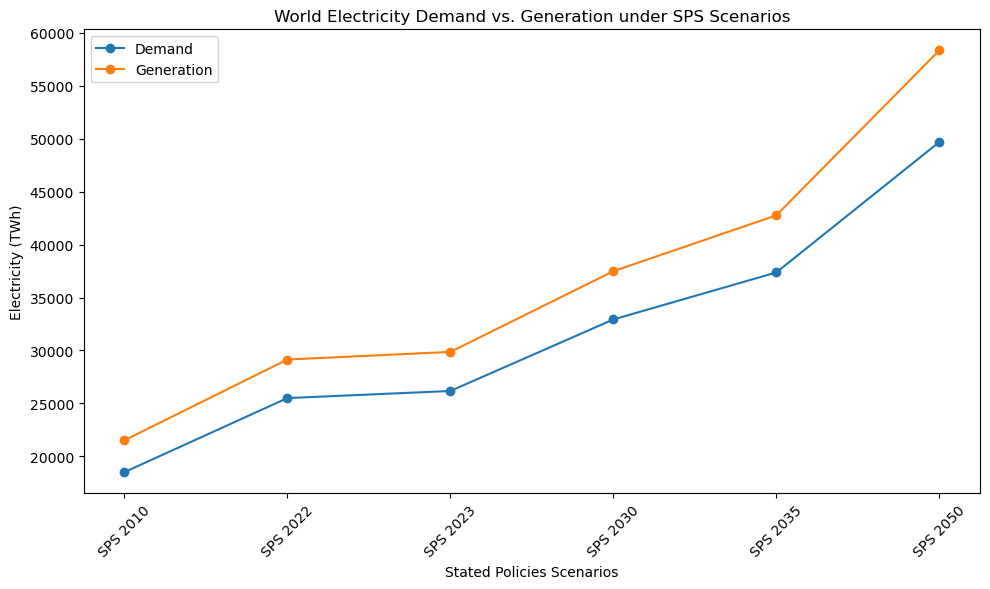

In [ ]:
# Filter the row for "World" from the Demand block.
world_data = Electricity_demand_generation_by_region[
    Electricity_demand_generation_by_region["Demand"]["Region"] == "World"
]

# Select only the SPS columns for both Demand and Generation.
demand_cols = [col for col in world_data["Demand"].columns if col.startswith("SPS")]
generation_cols = [col for col in world_data["Generation"].columns if col.startswith("SPS")]

# Extract the (only) row for "World" as Series from each block.
demand_values = world_data["Demand"][demand_cols].iloc[0]
generation_values = world_data["Generation"][generation_cols].iloc[0]

# Clean numeric values by removing spaces and converting to floats.
demand_values = demand_values.apply(lambda x: float(str(x).replace(" ", "")))
generation_values = generation_values.apply(lambda x: float(str(x).replace(" ", "")))

# Use the scenario names (the SPS column names) as x-axis labels.
scenario_names = demand_cols

plt.figure(figsize=(10, 6))
plt.plot(scenario_names, demand_values, marker='o', label='Demand')
plt.plot(scenario_names, generation_values, marker='o', label='Generation')
plt.xlabel('Stated Policies Scenarios')
plt.ylabel('Electricity (TWh)')
plt.title('World Electricity Demand vs. Generation under SPS Scenarios')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

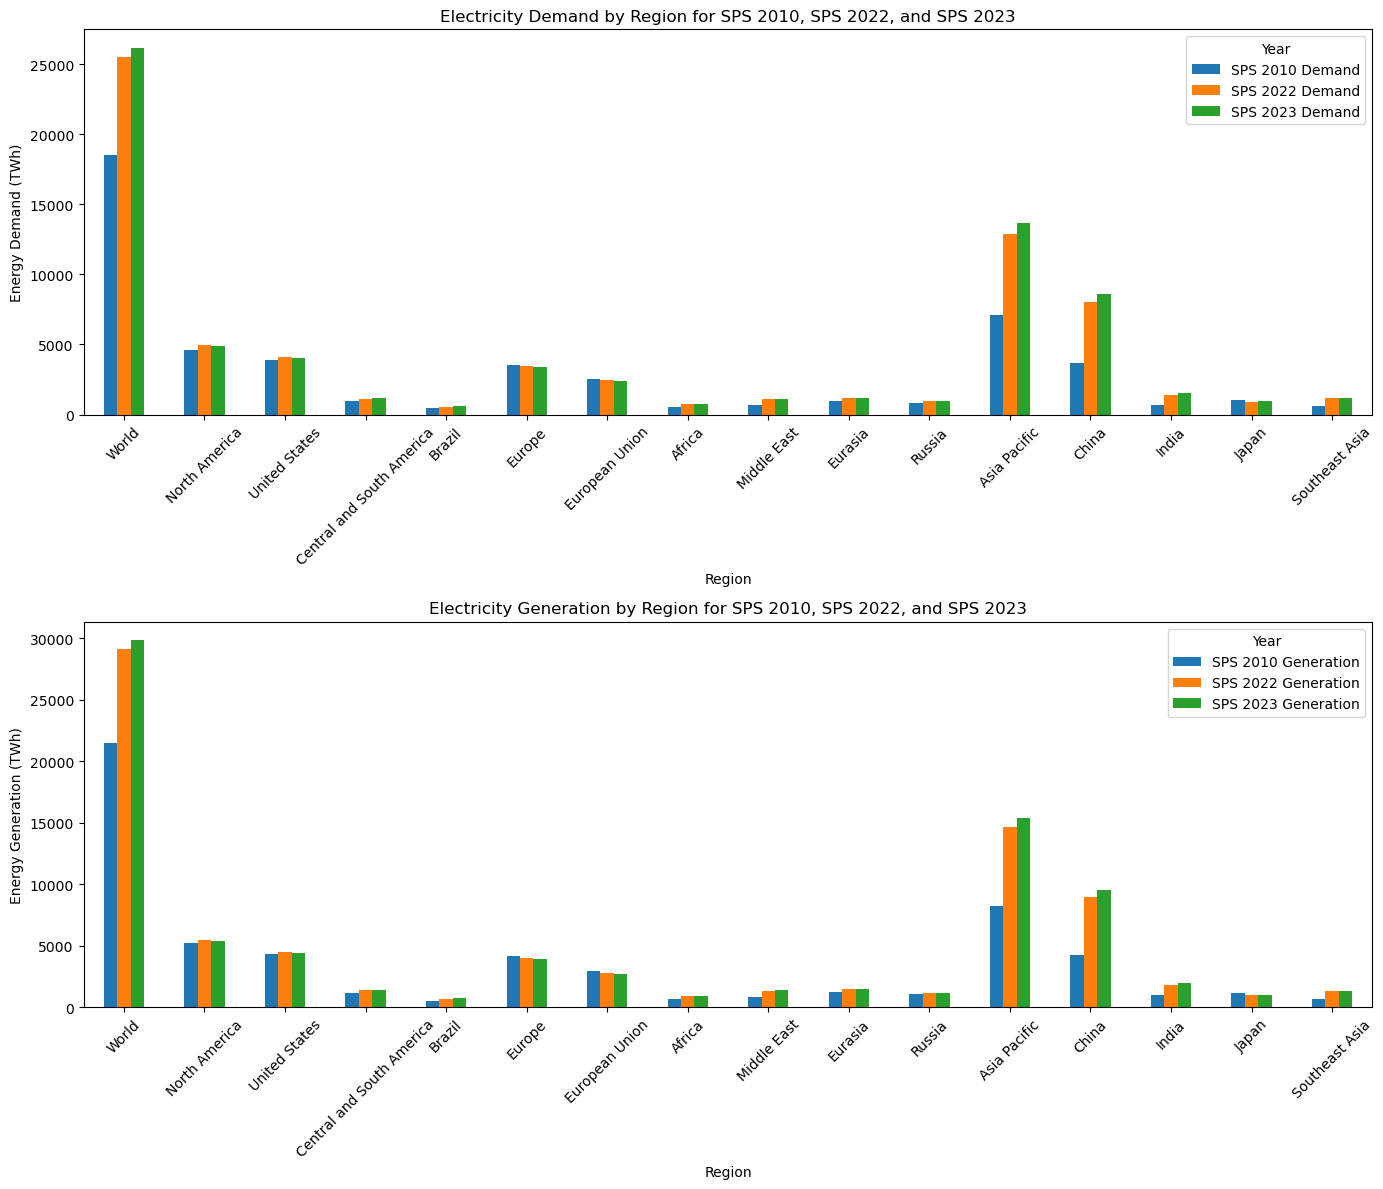

In [ ]:
# Sample Data
data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil', 'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia', 'Asia Pacific', 'China', 'India', 'Japan', 'Southeast Asia'],
    'SPS 2010 Demand': ['18 503', '4 632', '3 880', '932', '451', '3 563', '2 571', '570', '690', '985', '828', '7 132', '3 659', '715', '1 071', '607'],
    'SPS 2022 Demand': ['25 502', '4 958', '4 117', '1 138', '574', '3 498', '2 474', '721', '1 102', '1 190', '936', '12 897', '8 010', '1 391', '922', '1 156'],
    'SPS 2023 Demand': ['26 172', '4 890', '4 044', '1 182', '602', '3 394', '2 381', '729', '1 126', '1 207', '947', '13 645', '8 601', '1 510', '934', '1 204'],
    'SPS 2010 Generation': ['21 511', '5 230', '4 354', '1 129', '516', '4 119', '2 955', '687', '829', '1 251', '1 036', '8 265', '4 236', '972', '1 164', '685'],
    'SPS 2022 Generation': ['29 145', '5 468', '4 473', '1 372', '677', '3 980', '2 793', '901', '1 342', '1 457', '1 149', '14 625', '8 947', '1 814', '1 010', '1 284'],
    'SPS 2023 Generation': ['29 863', '5 390', '4 412', '1 419', '710', '3 885', '2 705', '913', '1 370', '1 477', '1 163', '15 409', '9 566', '1 943', '1 016', '1 337']
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove spaces and convert to numeric
for col in df.columns[1:]:
    df[col] = df[col].str.replace(' ', '').astype(float)

# Set 'Region' as the index
df.set_index('Region', inplace=True)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Demand plot
df[['SPS 2010 Demand', 'SPS 2022 Demand', 'SPS 2023 Demand']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Electricity Demand by Region for SPS 2010, SPS 2022, and SPS 2023')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Energy Demand (TWh)')
axes[0].legend(title='Year')
axes[0].tick_params(axis='x', rotation=45)

# Generation plot
df[['SPS 2010 Generation', 'SPS 2022 Generation', 'SPS 2023 Generation']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Electricity Generation by Region for SPS 2010, SPS 2022, and SPS 2023')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Energy Generation (TWh)')
axes[1].legend(title='Year')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


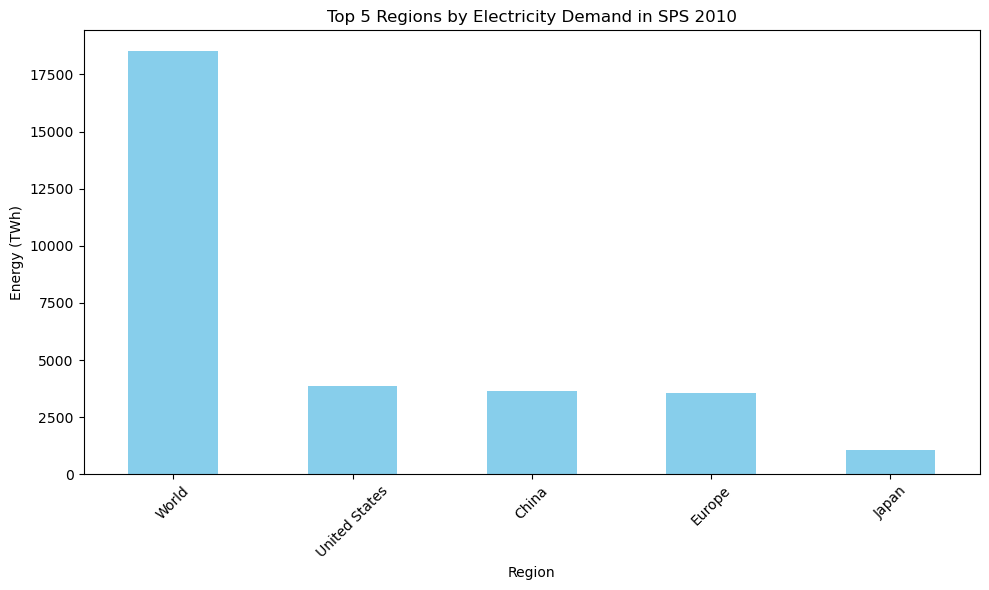

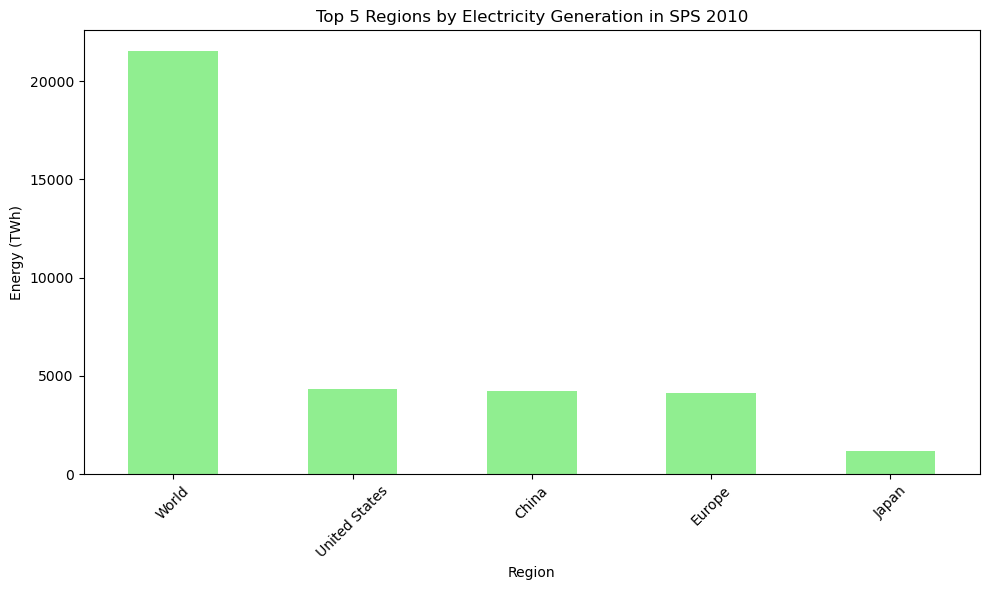

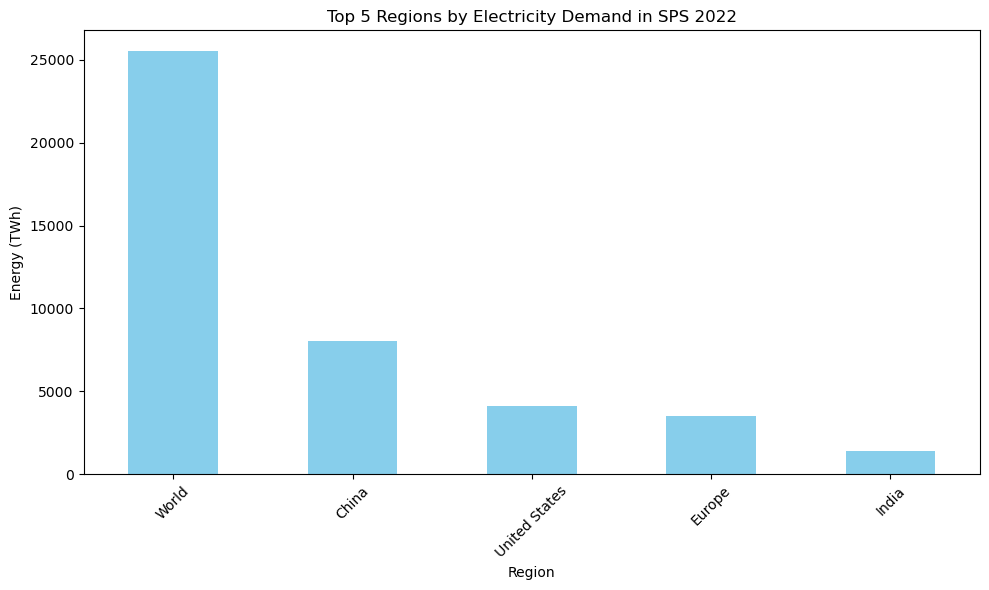

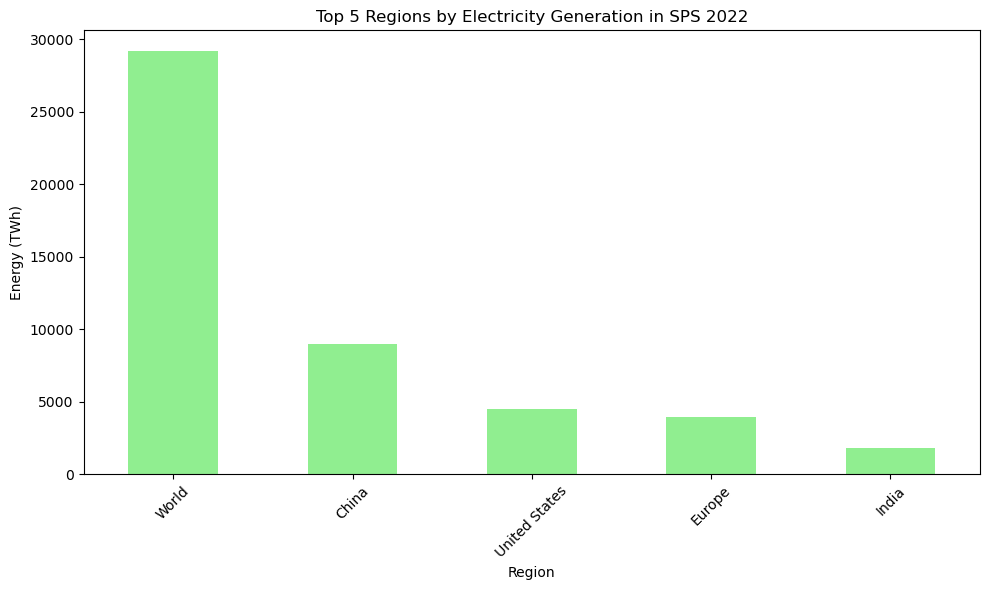

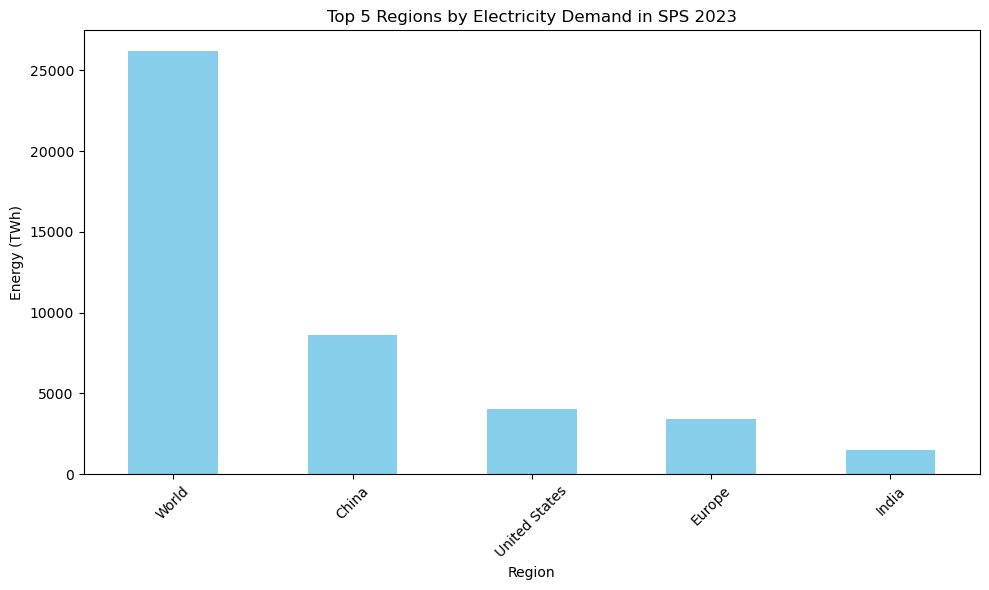

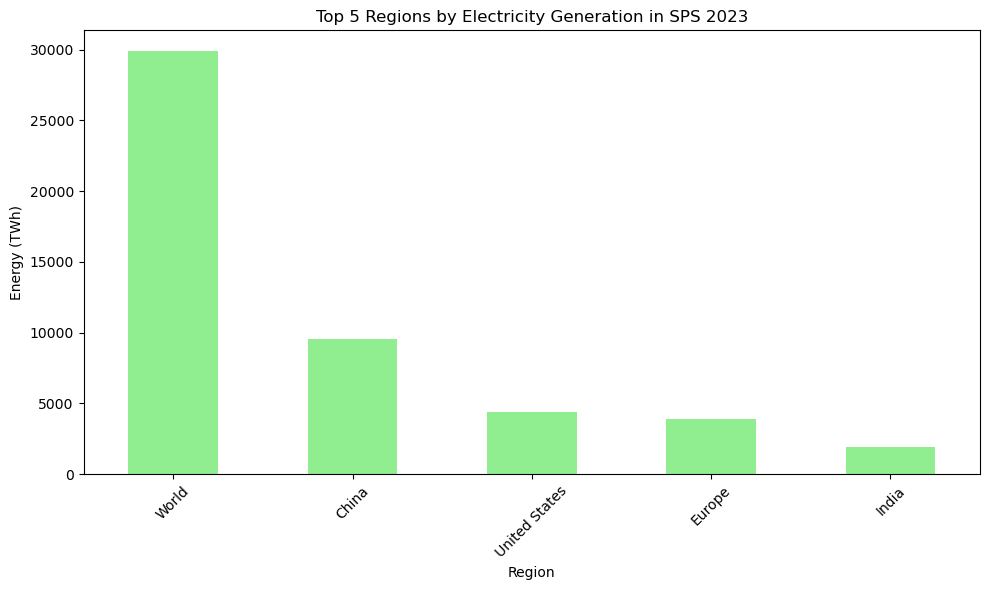

In [ ]:
# Sample Data
data = {
    'Region': ['World',  'United States', 'Central and South America', 'Brazil', 'Europe', 'Africa', 'Middle East', 'Russia', 'China', 'India', 'Japan', 'Southeast Asia'],
    'SPS 2010 Demand': ['18 503', '3 880', '932', '451', '3 563', '570', '690', '828', '3 659', '715', '1 071', '607'],
    'SPS 2022 Demand': ['25 502', '4 117', '1 138', '574', '3 498', '721', '1 102', '936', '8 010', '1 391', '922', '1 156'],
    'SPS 2023 Demand': ['26 172', '4 044', '1 182', '602', '3 394', '729', '1 126', '947','8 601', '1 510', '934', '1 204'],
    'SPS 2010 Generation': ['21 511', '4 354', '1 129', '516', '4 119', '687', '829', '1 036','4 236', '972', '1 164', '685'],
    'SPS 2022 Generation': ['29 145',  '4 473', '1 372', '677', '3 980', '901', '1 342', '1 149','8 947', '1 814', '1 010', '1 284'],
    'SPS 2023 Generation': ['29 863', '4 412', '1 419', '710', '3 885', '913', '1 370', '1 163', '9 566', '1 943', '1 016', '1 337']
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove spaces and convert to numeric
for col in df.columns[1:]:
    df[col] = df[col].str.replace(' ', '').astype(float)

# Set 'Region' as the index
df.set_index('Region', inplace=True)

# Function to plot top 5 regions for a given year and type (Demand/Generation)
def plot_top5(year, data_type):
    plt.figure(figsize=(10, 6))
    column_name = f'SPS {year} {data_type}'
    top5 = df.nlargest(5, column_name)[column_name]
    top5.plot(kind='bar', color='skyblue' if data_type == 'Demand' else 'lightgreen')
    plt.title(f'Top 5 Regions by Electricity {data_type} in SPS {year}')
    plt.xlabel('Region')
    plt.ylabel('Energy (TWh)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting for each year and type
for year in [2010, 2022, 2023]:
    for data_type in ['Demand', 'Generation']:
        plot_top5(year, data_type)


In [ ]:
# Existing data
data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil',
               'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia',
               'Asia Pacific', 'China', 'India', 'Japan', 'Southeast Asia'],
    'SPS 2010': ['18 503', '4 632', '3 880', '932', '451', '3 563', '2 571', '570', '690', '985', '828', '7 132', '3 659', '715', '1 071', '607'],
    'SPS 2022': ['25 502', '4 958', '4 117', '1 138', '574', '3 498', '2 474', '721', '1 102', '1 190', '936', '12 897', '8 010', '1 391', '922', '1 156'],
    'SPS 2023': ['26 172', '4 890', '4 044', '1 182', '602', '3 394', '2 381', '729', '1 126', '1 207', '947', '13 645', '8 601', '1 510', '934', '1 204']
}

# Create DataFrame
Electricity_demand_generation_by_region = pd.DataFrame(data)

# Remove spaces and convert to numeric
for col in ['SPS 2010', 'SPS 2022', 'SPS 2023']:
    Electricity_demand_generation_by_region[col] = Electricity_demand_generation_by_region[col].str.replace(' ', '').astype(float)

# GDP and Population data
gdp_population_data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil',
               'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia',
               'Asia Pacific', 'China', 'India', 'Japan', 'Southeast Asia'],
    'GDP (Trillion USD)': [85.8, 24.8, 21.4, 3.9, 2.1, 20.7, 15.6, 2.6, 3.8, 1.9, 1.5, 31.0, 14.3, 2.9, 5.1, 3.0],
    'Population (Million)': [7800, 368, 331, 653, 213, 748, 447, 1340, 260, 230, 146, 4560, 1400, 1380, 126, 655]
}

# Create DataFrame for GDP and Population
gdp_pop_df = pd.DataFrame(gdp_population_data)

# Merge the dataframes on 'Region'
Electricity_demand_generation_by_region = pd.merge(Electricity_demand_generation_by_region, gdp_pop_df, on='Region')

Electricity_demand_generation_by_region.head(20)

,Region,SPS 2010,SPS 2022,SPS 2023,GDP (Trillion USD),Population (Million)
0,World,18503.0,25502.0,26172.0,85.8,7800
1,North America,4632.0,4958.0,4890.0,24.8,368
2,United States,3880.0,4117.0,4044.0,21.4,331
3,Central and South America,932.0,1138.0,1182.0,3.9,653
4,Brazil,451.0,574.0,602.0,2.1,213
5,Europe,3563.0,3498.0,3394.0,20.7,748
6,European Union,2571.0,2474.0,2381.0,15.6,447
7,Africa,570.0,721.0,729.0,2.6,1340
8,Middle East,690.0,1102.0,1126.0,3.8,260
9,Eurasia,985.0,1190.0,1207.0,1.9,230


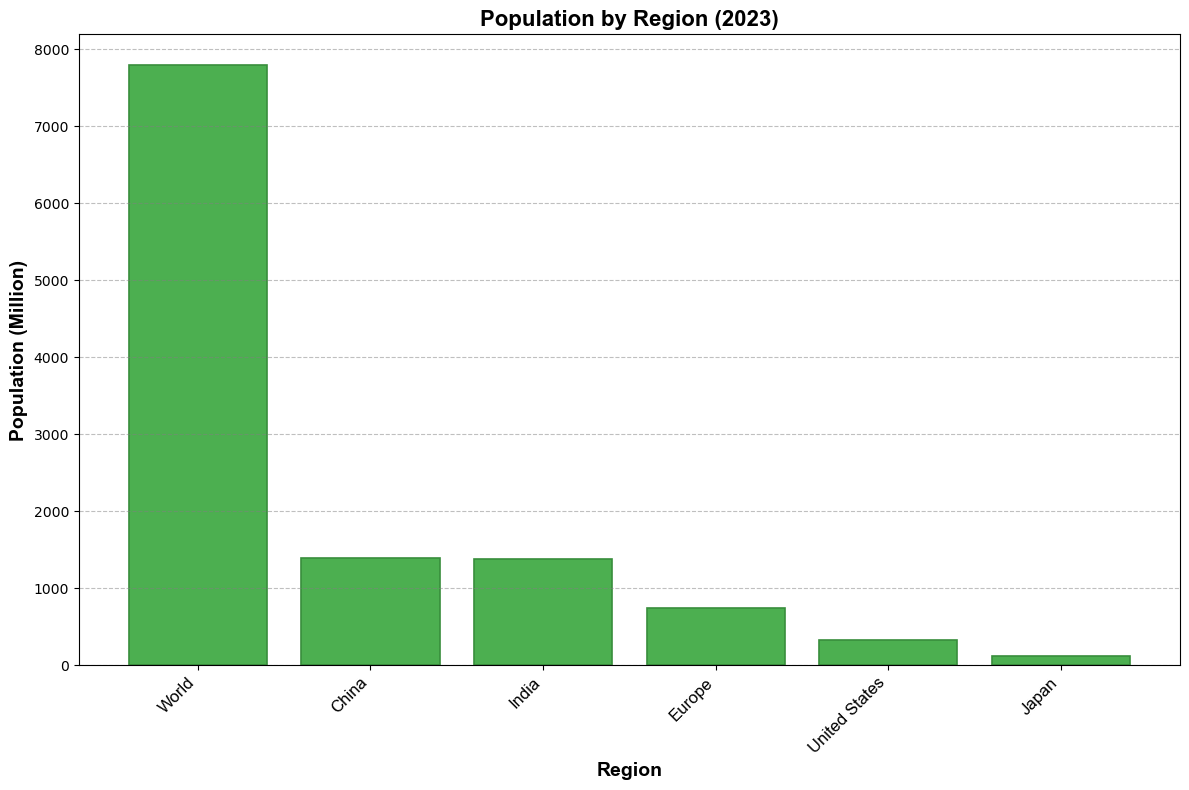

In [ ]:
# Existing data for Electricity demand generation by region
data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil',
               'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia',
               'Asia Pacific', 'China', 'India', 'Japan', 'Southeast Asia'],
    'SPS 2010': ['18 503', '4 632', '3 880', '932', '451', '3 563', '2 571', '570', '690', '985', '828', '7 132', '3 659', '715', '1 071', '607'],
    'SPS 2022': ['25 502', '4 958', '4 117', '1 138', '574', '3 498', '2 474', '721', '1 102', '1 190', '936', '12 897', '8 010', '1 391', '922', '1 156'],
    'SPS 2023': ['26 172', '4 890', '4 044', '1 182', '602', '3 394', '2 381', '729', '1 126', '1 207', '947', '13 645', '8 601', '1 510', '934', '1 204']
}

# Create DataFrame for Electricity demand generation by region
Electricity_demand_generation_by_region = pd.DataFrame(data)

# Remove spaces and convert to numeric
for col in ['SPS 2010', 'SPS 2022', 'SPS 2023']:
    Electricity_demand_generation_by_region[col] = Electricity_demand_generation_by_region[col].str.replace(' ', '').astype(float)

# GDP and Population data
gdp_population_data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil',
               'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia',
               'Asia Pacific', 'China', 'India', 'Japan', 'Southeast Asia'],
    'GDP (Trillion USD)': [85.8, 24.8, 21.4, 3.9, 2.1, 20.7, 15.6, 2.6, 3.8, 1.9, 1.5, 31.0, 14.3, 2.9, 5.1, 3.0],
    'Population (Million)': [7800, 368, 331, 653, 213, 748, 447, 1340, 260, 230, 146, 4560, 1400, 1380, 126, 655]
}

# Create DataFrame for GDP and Population
gdp_pop_df = pd.DataFrame(gdp_population_data)

# Merge the dataframes on 'Region'
Electricity_demand_generation_by_region = pd.merge(Electricity_demand_generation_by_region, gdp_pop_df, on='Region')

# Remove specified regions
regions_to_remove = ['North America', 'Central and South America', 'Brazil', 'European Union', 'Africa', 
                     'Middle East', 'Eurasia', 'Russia', 'Asia Pacific', 'Southeast Asia']
Electricity_demand_generation_by_region = Electricity_demand_generation_by_region[~Electricity_demand_generation_by_region['Region'].isin(regions_to_remove)]

# Sort the data by Population in descending order
sorted_data = Electricity_demand_generation_by_region.sort_values(by='Population (Million)', ascending=False)

# Create a bar plot for Population by region
plt.figure(figsize=(12, 8))

# Create bars for Population
bars = plt.bar(sorted_data['Region'], sorted_data['Population (Million)'], color='#4CAF50', edgecolor='#388E3C', linewidth=1.2)

# Customize labels and title with a modern font and design
plt.xlabel('Region', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('Population (Million)', fontsize=14, fontweight='bold', family='Arial')
plt.title('Population by Region (2023)', fontsize=16, fontweight='bold', family='Arial')

# Make the grid lighter and add subtle gridlines for better readability
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5)

# Rotate x-axis labels to prevent overlap and improve readability
plt.xticks(rotation=45, ha='right', fontsize=12, family='Arial')

# Set a more spacious layout
plt.tight_layout()

# Show the plot
plt.show()


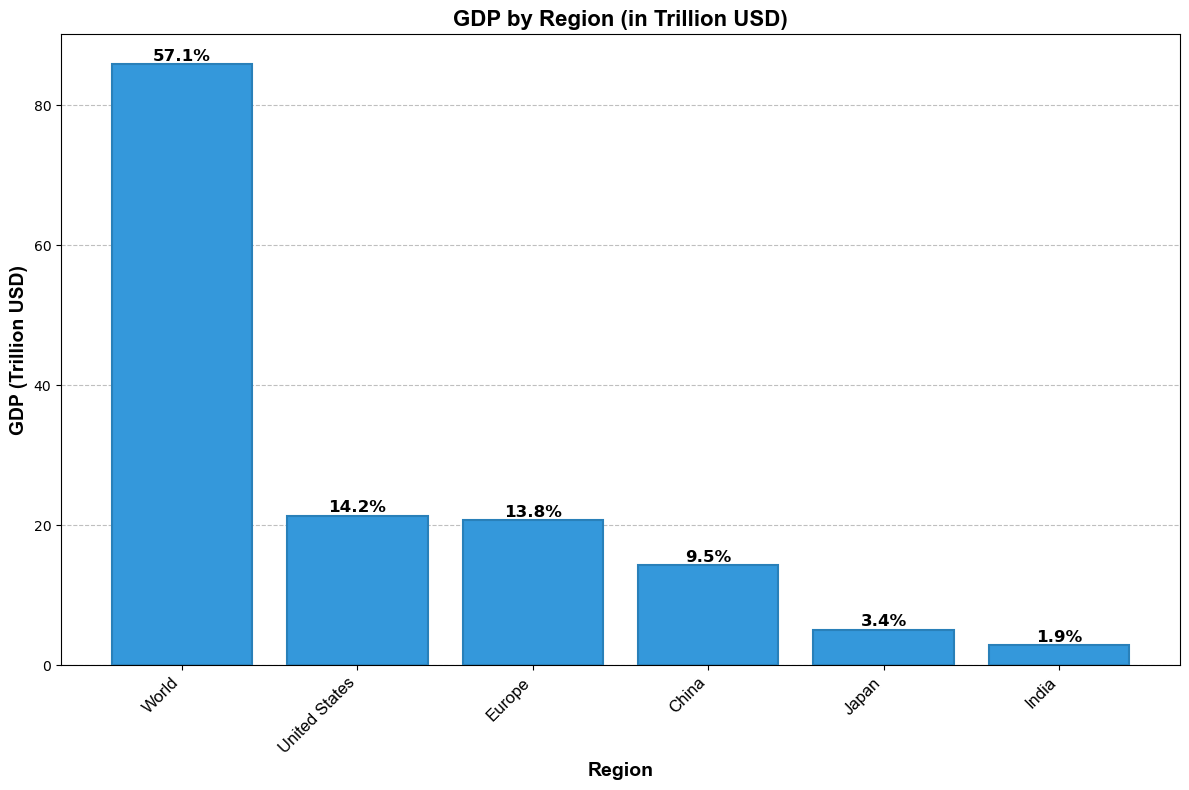

In [ ]:
data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil',
               'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia',
               'Asia Pacific', 'China', 'India', 'Japan', 'Southeast Asia'],
    'SPS 2010': ['18 503', '4 632', '3 880', '932', '451', '3 563', '2 571', '570', '690', '985', '828', '7 132', '3 659', '715', '1 071', '607'],
    'SPS 2022': ['25 502', '4 958', '4 117', '1 138', '574', '3 498', '2 474', '721', '1 102', '1 190', '936', '12 897', '8 010', '1 391', '922', '1 156'],
    'SPS 2023': ['26 172', '4 890', '4 044', '1 182', '602', '3 394', '2 381', '729', '1 126', '1 207', '947', '13 645', '8 601', '1 510', '934', '1 204']
}

# Create DataFrame for Electricity demand generation by region
Electricity_demand_generation_by_region = pd.DataFrame(data)

# Remove spaces and convert to numeric
for col in ['SPS 2010', 'SPS 2022', 'SPS 2023']:
    Electricity_demand_generation_by_region[col] = Electricity_demand_generation_by_region[col].str.replace(' ', '').astype(float)

# GDP and Population data
gdp_population_data = {
    'Region': ['World', 'North America', 'United States', 'Central and South America', 'Brazil',
               'Europe', 'European Union', 'Africa', 'Middle East', 'Eurasia', 'Russia',
               'Asia Pacific', 'China', 'India', 'Japan', 'Southeast Asia'],
    'GDP (Trillion USD)': [85.8, 24.8, 21.4, 3.9, 2.1, 20.7, 15.6, 2.6, 3.8, 1.9, 1.5, 31.0, 14.3, 2.9, 5.1, 3.0],
    'Population (Million)': [7800, 368, 331, 653, 213, 748, 447, 1340, 260, 230, 146, 4560, 1400, 1380, 126, 655]
}

# Create DataFrame for GDP and Population
gdp_pop_df = pd.DataFrame(gdp_population_data)

# Merge the dataframes on 'Region'
Electricity_demand_generation_by_region = pd.merge(Electricity_demand_generation_by_region, gdp_pop_df, on='Region')

# Remove specified regions from the data
regions_to_remove = ['North America', 'Central and South America', 'Brazil', 'European Union', 
                     'Africa', 'Middle East', 'Eurasia', 'Russia', 'Asia Pacific', 'Southeast Asia']

filtered_data = Electricity_demand_generation_by_region[~Electricity_demand_generation_by_region['Region'].isin(regions_to_remove)]

# Sort the data by GDP in descending order
sorted_data = filtered_data.sort_values(by='GDP (Trillion USD)', ascending=False)

# Calculate the total GDP
total_gdp = sorted_data['GDP (Trillion USD)'].sum()

# Calculate the percentage of total GDP for each region
sorted_data['GDP Percentage'] = (sorted_data['GDP (Trillion USD)'] / total_gdp) * 100

# Create a bar plot for GDP by region 
plt.figure(figsize=(12, 8))

# Create bars for GDP
bars = plt.bar(sorted_data['Region'], sorted_data['GDP (Trillion USD)'], color='#3498db', edgecolor='#2980b9', linewidth=1.5, zorder=3)

# Overlay the GDP Percentage on top of the bars
for bar, percentage in zip(bars, sorted_data['GDP Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.1f}%', 
             ha='center', fontsize=12, fontweight='bold', color='black')

# Add gridlines with subtle style for better readability
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5, zorder=0)

# Set labels and title with modern, bold fonts
plt.xlabel('Region', fontsize=14, fontweight='bold', family='Arial')
plt.ylabel('GDP (Trillion USD)', fontsize=14, fontweight='bold', family='Arial')
plt.title('GDP by Region (in Trillion USD)', fontsize=16, fontweight='bold', family='Arial')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, family='Arial')

# Adjust layout for a clean, spacious look
plt.tight_layout()

# Show the plot
plt.show()
